# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [2]:

# Region Map

import matplotlib.pyplot as plt
import mplleaflet

lons = [-84.0158, -83.7611, -83.6933, -83.7108, -83.8608, -83.4358, -84.0133, -83.6489, -83.9858, -84.0236, -83.6186, -83.6769, -83.4158, -83.28, -83.7819, -83.82, -83.5831, -83.9336, -84.1108, -83.7831, -83.4764, -84.4667, -83.5333, -83.7444]
lats = [41.9164, 42.2875, 42.2417, 42.2947, 41.84, 42.0636, 42.3264, 41.9553, 42.4344, 42.1508, 42.0664, 42.0811, 41.9069, 41.9497, 42.1611, 42.1236, 41.8069, 42.0028, 42.0283, 42.4356, 41.5631, 42.2667, 42.2333, 42.2228]

plt.figure(figsize=(8,8))

plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

mplleaflet.display()



C:\Users\Vardaan\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Data Manipulation 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib notebook

In [3]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df['Date']=pd.to_datetime(df['Date'])
df['Month_Day']=df['Date'].dt.strftime('%m-%d')

df=df[df['Month_Day']!='02-29']
df['Data_Value']=df['Data_Value']*.1        

# converted date string to datetime and added a seperate column of day_month 
# removed feb 29 values and converted temp to celsius 

In [4]:
plotmax=df[(df['Date']<'2015-01-01') & (df['Element']=='TMAX')].groupby('Month_Day')['Data_Value'].max()
plotmin=df[(df['Date']<'2015-01-01') & (df['Element']=='TMIN')].groupby('Month_Day')['Data_Value'].min()

maxmin=pd.merge(plotmax,plotmin ,on='Month_Day')
maxmin.columns=['Max_Decade','Min_Decade']

# created new series of length 365 rows each having record temperature values over year 2005-14
# then merged them to form a single dataframe - maxmin (for further use)

In [5]:
maxmin['Max_2015']=df[(df['Date']>='2015-01-01') & (df['Element']=='TMAX')].groupby('Month_Day')['Data_Value'].max()
maxmin['Min_2015']=df[(df['Date']>='2015-01-01') & (df['Element']=='TMIN')].groupby('Month_Day')['Data_Value'].min()

# added new columns to maxmin having record max and min values of year 2015

In [6]:
maxmin=maxmin[['Max_Decade','Max_2015','Min_Decade','Min_2015']]
maxmin.reset_index(inplace=True)
maxmin['Max_Record']=np.NaN
maxmin['Min_Record']=np.NaN

for x in range (365):
    if maxmin.loc[x,'Max_2015']>maxmin.loc[x,'Max_Decade']:
        maxmin.loc[x,'Max_Record']=maxmin.loc[x,'Max_2015']
        
    if maxmin.loc[x,'Min_2015']<maxmin.loc[x,'Min_Decade']:
        maxmin.loc[x,'Min_Record']=maxmin.loc[x,'Min_2015']

# rearranged the columns to improve readbility of table 
# added 2 new columns which will have the 2015 temperature values when past decade record was broken 
# if record was not broken then it will have NaN values

In [26]:
max_record=maxmin[['Month_Day','Max_Record']].dropna()
max_record['year']='2015-'
max_record['Month_Day']=max_record['year']+max_record['Month_Day']

min_record=maxmin[['Month_Day','Min_Record']].dropna()
min_record['year']='2015-'
min_record['Month_Day']=min_record['year']+min_record['Month_Day']

# dropped all NaN values and added year to month_day for plotting 

In [22]:
'''
max_record=maxmin[['Month_Day','Max_Record']].dropna()
maxr_dates=list(max_record['Month_Day'])
for e in range (len(maxr_dates)) :
    maxr_dates[e]='2015-'+maxr_dates[e]
    
min_record=maxmin[['Month_Day','Min_Record']].dropna()
minr_dates=list(min_record['Month_Day'])
for e in range (len(minr_dates)) :
    minr_dates[e]='2015-'+minr_dates[e]

    
# dropped all NaN values and created a list of dates when teperature record was broken in year 2015 

same thing done in above cell in a shorter way
'''

# Data Plotting

<IPython.core.display.Javascript object>


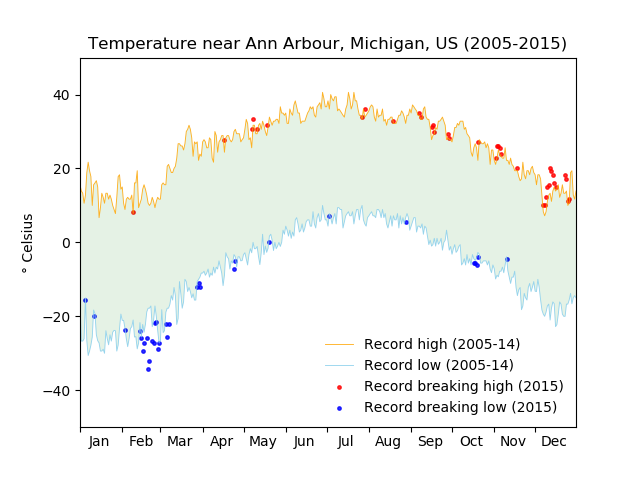

In [28]:
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')
plt.figure()   # this means new figure

plt.plot(date_index,plotmax.values,'-',c='orange',linewidth=.65,alpha=.85)

plt.plot(date_index,plotmin.values,'-',c='skyblue',linewidth=.65,alpha=.85)

plt.scatter(max_record['Month_Day'],max_record['Max_Record'], color='red',s=6,alpha=.8)
plt.scatter(min_record['Month_Day'],min_record['Min_Record'], color='blue',s=6,alpha=.8)

plt.legend(['Record high (2005-14)','Record low (2005-14)','Record breaking high (2015)','Record breaking low (2015)'],
           loc=0,frameon=False)

# set labels for axes and plot
plt.ylabel('° Celsius', fontsize=10)
plt.title('Temperature near Ann Arbour, Michigan, US (2005-2015)', fontsize=12)

# set axes limits
ax=plt.gca()                                      # getting the child axis 
ax.axis(['2015/01/01','2015/12/31',-50,50])       # setting the x axis and y axis range


# fill color between max and min temperatures
ax.fill_between(date_index, plotmax,plotmin , facecolor='green', alpha=.1)


# ticks are basically the lines on x and y axis
# major ticks are big lines while minor ticks are smaller lines between the major ticks
# Where you locate the major and minor ticks:

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) 
#set major ticks by month and minor ticks in middle of the month so we set them from date 15 to 15 every month


# tells what to write under ticks , so we select %b which gives first 3 leters of the month 
# for major ticks we clear their labels 
# we do this so that month is written between the major ticks 
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))


for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0) # Make small ticker disappear
    tick.label1.set_horizontalalignment('center')




In [10]:
plt.gca.get_axis?

Object `plt.gca.get_axis` not found.
